# Análisis de una web 
BoardGameGeek (https://www.boardgamegeek.com/) es la página de referencia a nivel mundial del mundo de los juegos de mesa.
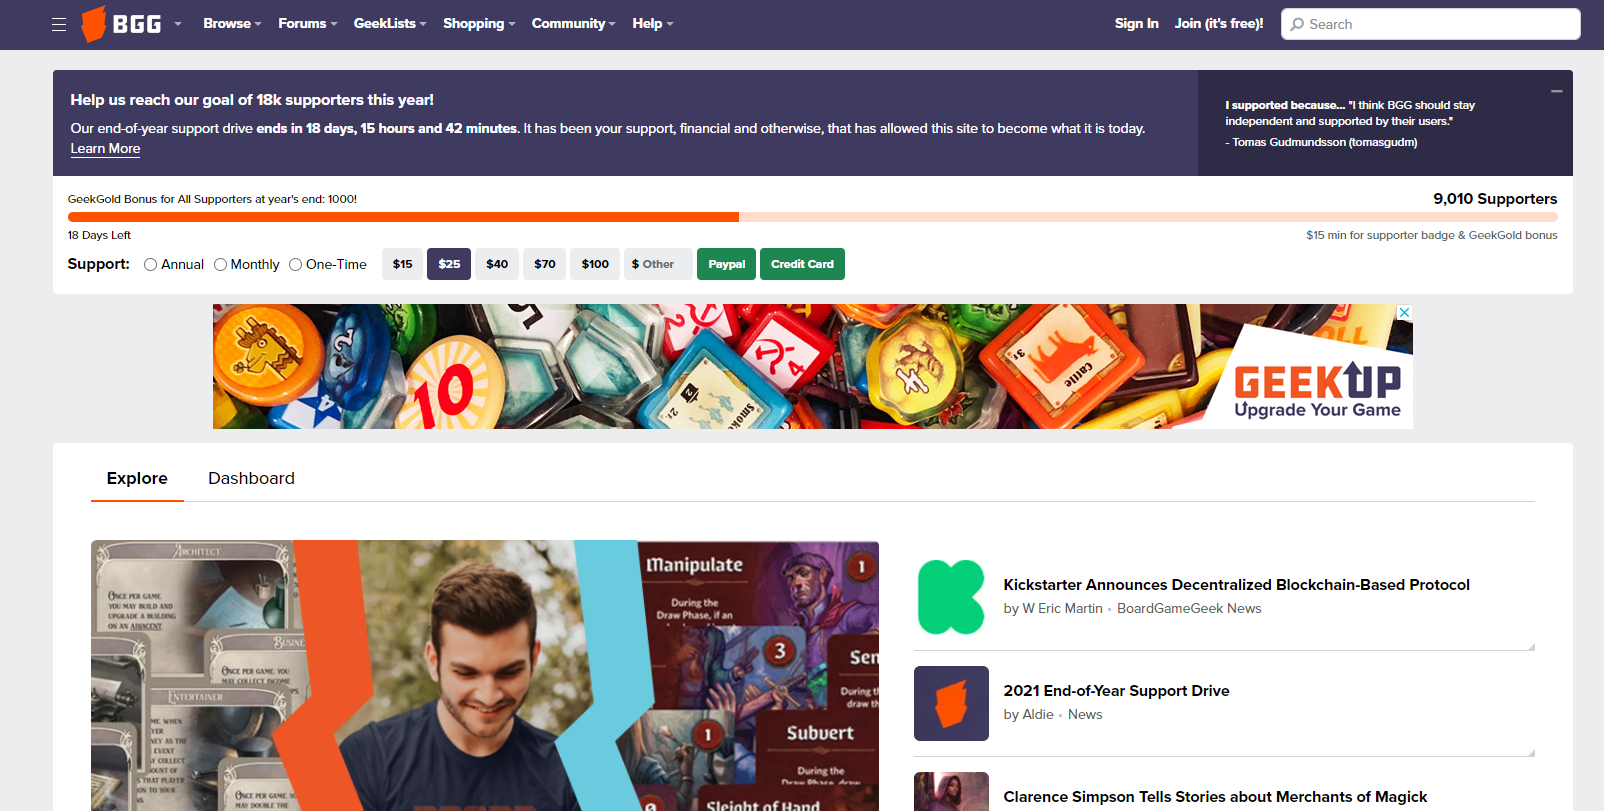

Por cada juego contiene una gran cantidad de información, entre las que destacan las valoraciones de los juegos. Se sospecha que estas valoraciones no son objetivas y que dependen no solo de la calidad del juego si no de factores externos. Nuestra misión es recolectar uan serie de datos y hacer un estudio preeliminar al respecto.
Por desgracia no tiene API para consulta de datos, así que tendremos que recuperar los datos de forma manual desde la propia web.
---

#  1) Recopilar los datos de los 100 primeros juegos en el ranking global de la web. La función debe devolver un diccionario donde la clave es el id del juego y el valor el nombre del mismo
 #  * (1 punto)

In [1]:
#AQUI ME HE HECHO UN TRYHARDEO Y TE HE DADO LA OPCIÓN DE RECOPILAR LOS N CIENTOS MEJORES TITULOS POR QUE 
#100 JUEGOS ME PARECÍAN POCOS
#(SIEMPRE Y CUANDO LA PAGINA NO ESTE ROTA COMO PASO EN DICIEMBRE)
def recopila_los_N_cientos_mejores_titulos(N):
    N = int(N)
    import requests
    from bs4 import BeautifulSoup
    BGs = {}

    #Recorremos las páginas desde la 1 hasta la página que hayamos indicado
    #(Se podría hacer de la misma manera que te recorra n paginas desde una pagina x de inicio o 
    #que te recorriera desde una pagina x hasta una pagina y)
    for vuelta in range(N):
        codigo = requests.get("https://boardgamegeek.com/browse/boardgame/page/"+str(1+vuelta)).text
        web = BeautifulSoup(codigo, "html.parser")
        #Busco la primera fila (hay que solo hay una tabla en este caso) y empiezo a recorrer filas
        for elem in web.find_all(id="row_"):
            columna = elem.find_all("td")[2]
            info = columna.find("a")
            BGs[int(info.get("href").split("/")[2])] = info.text
            #EL CODIGO A CONTINUACION SER LA MANERA DE HACER EFICIENTE EL EJERCICIO 3 DE COMPLETA DATOS
            #PERO REQUERIRÍA QUE LOS EJERCICIOS 2 Y 3 FUERAN UNO SOLO Y QUE EL EJERCICIO 2 TUVIERA DE ENTRADA
            #EL VALOR "href"
            #BGs[int(info.get("href").split("/")[2])] = {"titulo":info.text,"href":info.get("href")}

    return BGs 


In [2]:
#TEST
print(recopila_los_N_cientos_mejores_titulos(input()))

3
{174430: 'Gloomhaven', 161936: 'Pandemic Legacy: Season 1', 224517: 'Brass: Birmingham', 167791: 'Terraforming Mars', 291457: 'Gloomhaven: Jaws of the Lion', 233078: 'Twilight Imperium: Fourth Edition', 220308: 'Gaia Project', 187645: 'Star Wars: Rebellion', 162886: 'Spirit Island', 115746: 'War of the Ring: Second Edition', 182028: 'Through the Ages: A New Story of Civilization', 193738: 'Great Western Trail', 12333: 'Twilight Struggle', 342942: 'Ark Nova', 169786: 'Scythe', 316554: 'Dune: Imperium', 84876: 'The Castles of Burgundy', 167355: 'Nemesis', 173346: '7 Wonders Duel', 124361: 'Concordia', 28720: 'Brass: Lancashire', 120677: 'Terra Mystica', 177736: 'A Feast for Odin', 266192: 'Wingspan', 205637: 'Arkham Horror: The Card Game', 237182: 'Root', 266507: 'Clank!: Legacy – Acquisitions Incorporated', 183394: 'Viticulture Essential Edition', 199792: 'Everdell', 246900: 'Eclipse: Second Dawn for the Galaxy', 164928: 'Orléans', 96848: 'Mage Knight Board Game', 312484: 'Lost Ruins 

#   2) Crear una función por la que por cada id devuelva una estructura, a libre elección, con todos los datos necesarios (mínimo aquellos que se insertarán en la base de datos)
# * (2 punto)

In [4]:
def busca_juego(ident):
    import pandas as pd
    import json
    import pprint
    import requests
    from bs4 import BeautifulSoup
    
    #INTENTAMOS QUE NO SE INTRODUZCA NINGUN DATO INCORRECTO    
    if int(ident) < 0 or int(ident) > 999999:
        print("id no valida")
    else:
            
    
    
    #La siguiente parte de código es necesaria para completar el URL (en el ejercicio 1 propongo posible 
    #solucion que conlleva unificar el ejercicio 2 y 3)
    #que nos lleve a stats, donde se encuentra el json con la información:
    #https://boardgamegeek.com/boardgame/302723/forgotten-waters/stats
        #el tramo /302723 lo tengo ya que es la entrada del método
        #el tramo "/forgotten-waters" me falta 
    #Por ello, he de buscar en todas las páginas del browser de juegos hasta encontrar
    #el tramo /nombre-de-juego    
    
    
    
        encontrado = False
        pagina = 1
        #EL pagina < 1335 TIENE UN PEQUEÑO FALLO QUE HABRIA QUE OPTIMIZAR, Y ES QUE EL NUMERO DE PÁGINAS
        #EN BBGEEK AUMENTA CON EL TIEMPO ASIQUE HABRIA QUE MAPEARLO DE VEZ EN CUANDO PARA ACTUALIZARLO
        while encontrado == False and pagina < 1335:
            codigo = requests.get("https://boardgamegeek.com/browse/boardgame/page/"+str(pagina)).text
            web = BeautifulSoup(codigo, "html.parser")
            #recorro todas las filas de la tabla de juegos contenida en el browse
            #EL SIGUIENTE PRINT SOLO FUNCIONA EN ESTE EJERCICIO PERO APPLICANDO EL MÉTODO SIGUIENTE 
            #NO FUNCIONA
            #print("", end=f"\r Recorriendo pagina numero:"+ str(pagina))
            for filas in web.find_all(id="row_"):
                columnas = filas.find_all("td")[2]
                enlaces = columnas.a["href"]
                #una vez llegado a la fila del juego, comparo el ID de entrada con el
                #de la fila de la tabla.
                if str(enlaces.split("/")[2]) == str(ident): 
                    #Y obtengo finalmente el URL
                    #PD: esto se podría capturar en el ejercicio 1 y pedir de dato de entrada.
                    url= "https://www.boardgamegeek.com"+str(enlaces)+"/stats" 
                    encontrado = True
            pagina+=1
            #else: return datos
        

        if pagina == 1335:
               print("Juego no encontrado")
        
        #Meto la página de stats del juego en BeautifullSoup
        codigo_stats = requests.get(url).text
        web_stats = BeautifulSoup(codigo_stats, "html.parser")


        #Encontrar script donde se encuentra el JSON de oro
        html_script = web_stats.find_all("script")[2].text
        #Aislar el json dentro del script.texto
        substring = html_script[html_script.find('GEEK.geekitemPreload')+23:html_script.find('GEEK.geekitemSettings')-3]
        jdic = json.loads(substring)

        #Extraccion valores tabla principal
        titulo = jdic['item']['name']
        yearpublished = int(jdic['item']['yearpublished'])
        minage = int(jdic['item']['minage'])
        puntuacion = float(jdic['item']['stats']['average'])
        peso = float(jdic['item']['stats']['avgweight'])
        desviacion = float(jdic['item']['stats']['stddev'])
        copias = int(jdic['item']['stats']['numowned'])
        deseados = int(jdic['item']['stats']['numwish'])
        enVenta = int(jdic['item']['stats']['numtrading'])
        minplayers = int(jdic['item']['minplayers'])
        maxplayers = int(jdic['item']['maxplayers'])
        maxplaytime = int(jdic['item']['maxplaytime'])
        descripcion = jdic['item']['short_description']
        votos = int(jdic['item']['stats']['usersrated'])


        #Estructura cabecera lista
        cabecera=["titulo",
                  "yearpublished",
                  "minage",
                  "puntuacion",
                  "desviacion",
                  "peso",
                  "copias",
                  "deseados",
                  "enVenta",
                  "minplayers",
                  "maxplayers",
                  "maxplaytime",
                  "descripcion",
                  "votos"]
        #Estructura datos lista de listas
        datos=[titulo,
                  yearpublished,
                  minage,
                  puntuacion,
                  desviacion,
                  peso,
                  copias,
                  deseados,
                  enVenta,
                  minplayers,
                  maxplayers,
                  maxplaytime,
                  descripcion,
                  votos]
        #Creación de diccionario del Juego
        dicc_juegos = dict(zip(cabecera, datos))


        recop_categorias = {}
        recop_mecanicas = {}

        #CAPTURA DE CATEGORIAS
        for categorias in jdic["item"]["links"]["boardgamecategory"]:
            #MAPEO CATEGORIAS    
            recop_categorias[categorias["objectid"]]=categorias["name"]


        #CAPTURA DE MECANICAS
        for mecanicas in jdic["item"]["links"]["boardgamemechanic"]:
            #MAPEO MECANICAS
            recop_mecanicas[mecanicas["objectid"]]=mecanicas["name"]

        dicc_juegos.update({"recop_categorias":recop_categorias,"recop_mecanicas":recop_mecanicas})

        return (dicc_juegos)
            

   

In [5]:
#TEST
import pprint
pprint.pprint(busca_juego(input("Introduce una id de un juego cualquiera que exista en BoardGamesGeek: ")))


                                

Introduce una id de un juego cualquiera que exista en BoardGamesGeek: 174430
{'copias': 81412,
 'descripcion': 'Vanquish monsters with strategic cardplay. Fulfill your quest '
                'to leave your legacy!',
 'deseados': 18114,
 'desviacion': 1.64834,
 'enVenta': 705,
 'maxplayers': 4,
 'maxplaytime': 120,
 'minage': 14,
 'minplayers': 1,
 'peso': 3.8759,
 'puntuacion': 8.72183,
 'recop_categorias': {'1010': 'Fantasy',
                      '1020': 'Exploration',
                      '1022': 'Adventure',
                      '1046': 'Fighting',
                      '1047': 'Miniatures'},
 'recop_mecanicas': {'2018': 'Campaign / Battle Card Driven',
                     '2023': 'Cooperative Game',
                     '2689': 'Action Queue',
                     '2839': 'Action Retrieval',
                     '2857': 'Card Play Conflict Resolution',
                     '2893': 'Communication Limits'},
 'titulo': 'Gloomhaven',
 'votos': 50342,
 'yearpublished': 2017}


# 3) Crear una función a la que se le pase el diccionario del ejercicio 1 y lo modifique para que para cada valor almacene, en lugar del título del juego, la información que devuelve la función del ejercicio 2
# * (1 punto)

In [18]:

def completa_datos(dicc_ej1):
    juegos = {}
    count = 0
    for elem in dicc_ej1:
        juegos[elem]= busca_juego(elem)
        count +=1
        #DEBIDO A QUE TIENE QUE BUSCAR EL HREF DE CADA JUEGO INDEPENDIENTE QUE RECORRE
        #TARDA UN POCO Y LE HE PROGRAMADO UN PORCENTAJE COMPLETADO
        print("", end=f"\r Porcentaje Completado:"+ str(round(100-(len(dicc_ej1)-count)/len(dicc_ej1)*100,2)))
        
        
    return juegos



In [19]:
#TEST
import pprint
#INTRODUCE UN DICCIONARIO DEL EJERCICIO 1
juegos =  completa_datos(BGs)
pprint.pprint(juegos)


NameError: name 'BGs' is not defined

# 4) Crear una función a la que se le pase un elemento del tipo creado en el ejercicio 2 y lo guarde en una base de datos. Las tablas de dicha tabla deben ser las que cree el DLL anexo
# * (2 puntos)

In [336]:
def guardar_juego(juegos):
    
    import mysql.connector
    count = 0
    for key in juegos:
    #INTRODUCIR DATOS TABLA JUEGOS    
        sqljuegos = "INSERT INTO boardgameanalisis.juegos VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        conex = mysql.connector.connect(
                host = "localhost",
                user = "root", 
                password = "",
                database ="boardgameanalisis",
                port = 3306,
                autocommit=True)
        transaccion = conex.cursor()
        try:
            transaccion.execute(sqljuegos, (int(key),
                                  juegos[key]["titulo"], 
                                  juegos[key]["puntuacion"], 
                                  juegos[key]["peso"], 
                                  juegos[key]["desviacion"],
                                  juegos[key]["copias"], 
                                  juegos[key]["deseados"], 
                                  juegos[key]["enVenta"],
                                  juegos[key]["descripcion"]))
        except: 
            print("juego número "+ str(count+1) +" ya existe en base de datos")
            count+=1
        #INTRODUCIR DATOS TABLA CATEGORIAS
        for categoria in juegos[key]["recop_categorias"]:
            sqlcategorias = "INSERT INTO boardgameanalisis.categorias VALUES (%s,%s)"
            try:
                transaccion.execute(sqlcategorias,
                                    (categoria,
                                     juegos[key]["recop_categorias"][categoria]))
            except: 
                print("Categoria ya existe en BBDD")

            
        #INTRODUCIR DATOS TABLA MECANICAS
        for mecanica in juegos[key]["recop_mecanicas"]:
            sqlmecanicas = "INSERT INTO boardgameanalisis.mecanicas VALUES (%s,%s)"
            try:
                transaccion.execute(sqlmecanicas, 
                                    (mecanica,
                                    juegos[key]["recop_mecanicas"][mecanica]))
            except: 
                print("Mecanica ya existe en BBDD")

            
        #INTRODUCIR DATOS TABLA CATEGORIAS_JUEGO
        for cats in juegos[key]["recop_categorias"]:
            sqlcat_juego = "INSERT INTO boardgameanalisis.categoria_juego VALUES (%s,%s)"
            try:
                transaccion.execute(sqlcat_juego, 
                                    (int(key),int(cats)))
            except: 
                print("Relacion Juego-Categoria ya existe en BBDD")

            
            
            
        #INTRODUCIR DATOS TABLA MECANICAS_JUEGO
        for mecs in juegos[key]["recop_mecanicas"]:
            sqlmec_juego = "INSERT INTO boardgameanalisis.mecanicas_juego VALUES (%s,%s)"
            try:
                transaccion.execute(sqlmec_juego, 
                                    (int(key),int(mecs)))
            except: 
                print("Relacion Juego-Mecanica ya existe en BBDD")
    

In [337]:
#TEST
print(guardar_juego(juegos))

juego número 1 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 2 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica y

Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 22 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya 

Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 45 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria y

Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 70 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 71 ya existe en base de datos
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD


Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 94 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria

Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 119 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 120 ya existe en b

juego número 139 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 140 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya exi

Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 162 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 163 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica 

Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 185 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Categoria ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
Relacion Juego-Mecanica ya existe en BBDD
juego número 186 ya existe en base de datos
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Categoria ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Mecanica ya existe en BBDD
Relacion Juego-Categori

# 5) De todos los valores que hemos recuperado, los mas importantes son la puntuación media y la desviación típica. Diseñar una función que dado un juego le añada a la estructura el intervalo de confianza al 90% donde se deberían encontrar dichos datos
# * (1 punto)

In [338]:
def calcular_intervalo(id_juego):
    
    #Zalpha/2 = 1.65 segun la tabla de valores Z para el valor 0.45 = 0.9/2 
    Zalphamedios = 1.65
    
    std_dev = float(juegos[int(id_juego)]["desviacion"])
    media = float(juegos[int(id_juego)]["puntuacion"])
    n = int(juegos[int(id_juego)]["votos"])
    
    #Error estandar = Zalphamedios * desviacion estandar / votos^(1/2)
    std_err = Zalphamedios*std_dev/n**(1/2)
    
    #Intervalo de confianza = media +- error estandar
    conf_int = [str(media)+" \u00B1 "+str(std_err)+" =",media+Zalphamedios*std_dev/n**(1/2),media-Zalphamedios*std_dev/n**(1/2)]
    
    print ("El intervalo del juego seleccionado es el siguiente:")
    return conf_int



In [339]:
#TEST
print(calcular_intervalo(input("Introduce una id de un juego cargado en el diccionario juegos: ")))


Introduce una id de un juego cargado en el diccionario juegos: 224517
El intervalo del juego seleccionado es el siguiente:
['8.66336 ± 0.012780903575675873 =', 8.676140903575677, 8.650579096424325]


# 6) Buscar relaciones entre los valores de los juegos para encontrar la dependencia entre ellos. El objetivo es encontrar algún parámetro del que dependa la puntuación media en mayor medida. Los valores, técnicas y métodos que se usen para esta sección son totalmente libres, pero hay que justificar el por que se han seleccionado 

# * (3 puntos)

In [340]:
def analizar(juegosEj3):
# DOY POR HECHO QUE TRABAJAMOS AÚN CON EL DICCIONARIO JUEGOS, 
# ESTO TIENE LA PEGA DE QUE PARA TRABAJAR CON CANTIDAD GRANDE DE DATOS
# EL "ESCRAPEO DE 1000 DATOS TARDA UN POCO

    #PASO 1 CONVERTIR DATOS DEL DICCIONARIO EN DATOS NUMERICOS DE UN DATAFRAME
    import pandas as pd
    from datetime import datetime
    copias = []
    deseados = []
    desviacion = []
    enVenta = []
    maxplayers = []
    minage = []
    minplayers = []
    peso = []
    puntuacion = []
    votos = []
    deseados = []
    edadJuego = []
    maxplaytime = []

    for idjuego in juegosEj3:
        copias.append(juegos[idjuego]["copias"])
        desviacion.append(juegos[idjuego]["desviacion"])
        enVenta.append(juegos[idjuego]["enVenta"])
        maxplayers.append(juegos[idjuego]["maxplayers"])
        minage.append(juegos[idjuego]["minage"])
        minplayers.append(juegos[idjuego]["minplayers"])
        peso.append(juegos[idjuego]["peso"])
        puntuacion.append(juegos[idjuego]["puntuacion"])
        votos.append(juegos[idjuego]["votos"])
        deseados.append(juegos[idjuego]["deseados"])
        if int(datetime.now().year) - int(juegos[idjuego]["yearpublished"])<100:
            edadJuego.append(int(datetime.now().year) - int(juegos[idjuego]["yearpublished"]))
        deseados.append(juegos[idjuego]["deseados"])
        
    BGdf = pd.DataFrame(list(zip(puntuacion,votos,copias,deseados,desviacion,enVenta,maxplayers,minplayers,minage,peso,edadJuego)),columns =["puntuacion","votos","copias","deseados","desviacion","enVenta","maxplayers","minplayers","minage","peso","edadJuego"])
    print (BGdf)

    #PASO 2 OBTENER EL MAPA DE CALOR DE LAS RELACIONES ENTRE VARIABLES
    import seaborn as sns
    MapaCalor = sns.heatmap(BGdf.corr(),vmin=-0.1,vmax=0.1, annot=True)
    MapaCalor.set_title('Mapa de calor de las correlaciones entre los atributos numericos',fontdict={"fontsize":12},pad=12)
    
#     CONCLUSION: CREO QUE ES DIFICIL TOMAR CONCLUSIONES DE UNA CANTIDAD DE DATOS TAN PEQUEÑA 
#     CUANDO ESTAMOS ANALIZANDO LOS 1000 MEJORES JUEGOS DE MESA LAS PUNTUACIONES VAN DE 6,5 PARA ARRIBA.
#     CREO QUE TENDRÍA QUE HABER UNA CLARA RELACION ENTRE COPIAS Y PUNTUACIÓN QUE NO APARECE CUANDO TOMAMOS UNA
#     MUESTRA DE JUEGOS DE LOS CUALES SE PUEDE DECIR QUE CASI TODOS ELLOS SON BUENOS JUEGOS DE MESA.
    
    
    #PASO 3 DEL PASO 2 OBTENEMOS LAS VARIABLES QUE TIENEN INTERRELACION Y LAS RELACIONAMOS DIRECTAMENTE 
    #ENTRE SI PARA OBTENER UNA MEJOR IDEA
        #Relaciones puntuación: deseados, minage(edad minima) y peso
    
    import seaborn
    _puntuacion = BGdf["puntuacion"]
    _deseados = BGdf["deseados"]
    _peso = BGdf["peso"]
    _minage = BGdf["minage"]

    seaborn.jointplot(x=_deseados, y = _puntuacion, height =5)
    seaborn.jointplot(x=_peso, y = _puntuacion, height =5)
    seaborn.jointplot(x=_minage, y = _puntuacion, height =5)
    
#     - EN DESEADOS Y PUNTUACION VEMOS UNA RELACION QUE AUMENTA LINEALMENTE EN UNA PARTE DE LOS JUEGOS(NO EN TODOS) 
#     - EN PESO Y PUNTUACION VEMOS UNA RELACION QUE AUMENTA LINEALMENTE EN CASI TODOS LOS CASOS PERO CREO 
#     SINCERAMENTE QUE SE DEBE A QUE LOS JUEGOS CON MAS ELEMENTOS(NORMALMENTE MAS PESO) UN MECANICAS MAS 
#     COMPLEJAS SON MAS DIFICILES DE DESARROLLAR Y TAMBIEN SE PUNTUAN MEJOR, AHORA, ES UNA RELACION QUE SE VÉ CLARA
#     AL TENER UNA MUESTRA PEQUEÑA Y CREO QUE NO SE VERÍA BIEN EN UNA MUESTRA MAS GRANDE.
#     - EN EDAD MINIMA Y PUNTUACION VA EN LA MISMA LINEA CON EL PESO: JUEGOS COMPLEJOS Y PESADOS REQUIEREN 
#     UNA EDAD MINIMA MAYOR
    
    #PASO 4 OTRAS CONCLUSIONES INTERESANTES
      
    _deseados = BGdf["deseados"]
    _edadJuego = BGdf["edadJuego"]
    _peso = BGdf["peso"]
    _minage = BGdf["minage"]
    _enVenta = BGdf["enVenta"]
    _votos = BGdf["votos"]
    
    

    seaborn.jointplot(x=_peso, y = _minage, height =5)
    seaborn.jointplot(x=_votos, y = _enVenta, height =5)
    
#     - PARECE QUE SI QUE HAY UNA MINIMA LINEALIDAD ENTRE EDAD MINIMA Y PESO
#     - TAMBIEN PARECE QUE LOS JUEGOS MAS VOTADOS TAMBIEN TIENDEN A SER DE LOS QUE MAS HAY EN VENTA
    

     puntuacion  votos  copias  deseados  desviacion  enVenta  maxplayers  \
0       8.74291  48078   78112     17691     1.64121      661           4   
1       8.59314  45204   71090     17691     1.56358      335           4   
2       8.66336  25722   38476     11773     1.24231      127           4   
3       8.41701  74646  102498     11773     1.38773      548           5   
4       8.67440  16130   20648     11925     1.60475      120           6   
..          ...    ...     ...       ...         ...      ...         ...   
193     7.60025  11275   17363      3986     1.22332      156           5   
194     7.66695  13749   23479      6515     1.43086      291           6   
195     7.56168  20724   31659      6515     1.49080      718           5   
196     7.82449   6192    8318      4192     1.42771      249           4   
197     7.51887  18896   21135      4192     1.33058      323           5   

     minplayers  minage    peso  edadJuego  
0             1      14  3.869

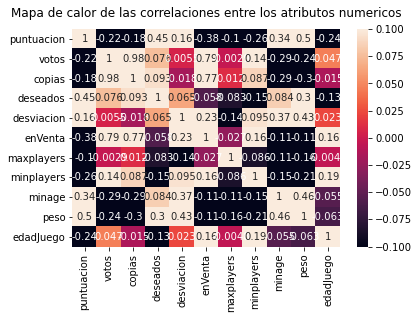

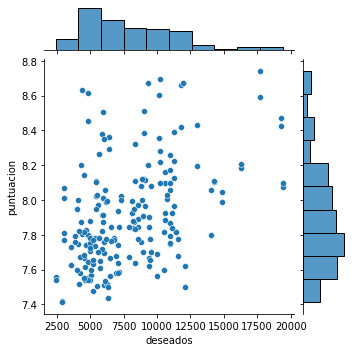

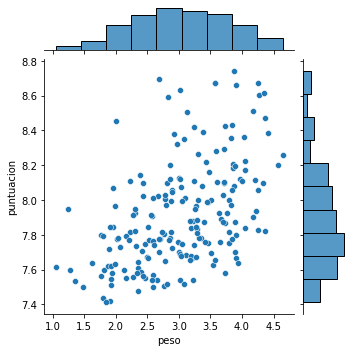

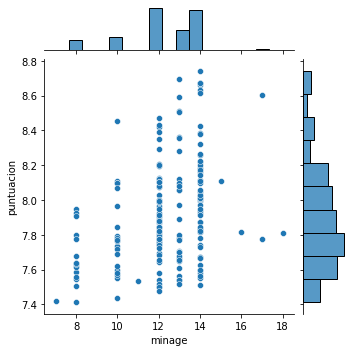

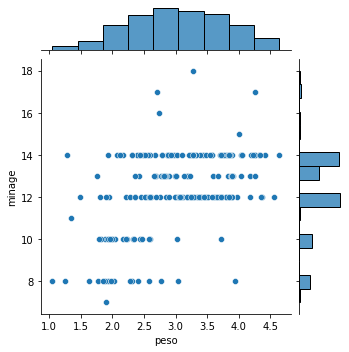

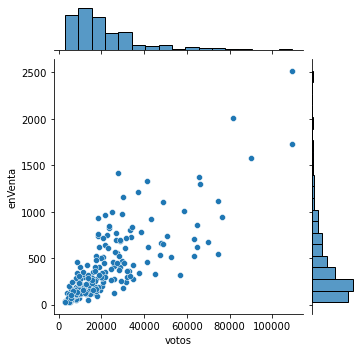

In [341]:
#TEST
analizar(juegos)

In [ ]:
def ConsultaBBDD():
    import mysql.connector
    import pandas as pd
    from sqlalchemy import create_engine

    cadena_conexion = 'mysql+pymysql://root@localhost:3306/boardgameanalisis'
    conexion = create_engine(cadena_conexion)
    try:
        a = input("Introduce query valida de SQL para obtener datos de la BBDD de Boardgameanalisys: ")
        query = pd.read_sql_query(str(a), con=conexion)
        print (query)
    except: 
        print("Algo ha fallado")

7) Te propongo que pruebes las siguientes consultas para obtener un par de datos interesantes de las mecánicas y las categorías obtenidas directamente desde la base de datos (he cargado 1000 juegos): 

SELECT count(*) as juegos_mec, mecanicas.descripcion 
FROM mecanicas_juego, mecanicas 
WHERE mecanicas_juego.id_mecanica = mecanicas.id_mecanica 
GROUP BY mecanicas.descripcion ORDER BY juegos_mec desc LIMIT 20;


SELECT count(*) as juegos_cat, categorias.descripcion
FROM categoria_juego, categorias
WHERE categoria_juego.id_categoria = categorias.id_categoria
GROUP BY categorias.descripcion
ORDER BY juegos_cat desc;

In [ ]:
#TEST
ConsultaBBDD()